In [32]:
import pandas as pd

# Load dataset
url = "https://media.geeksforgeeks.org/wp-content/uploads/20240319120216/housing.csv"
housing = pd.read_csv(url)

# Overview of dataset
print(housing.info())  # Check data types and missing values
print(housing.describe())  # Summary statistics
print(housing.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

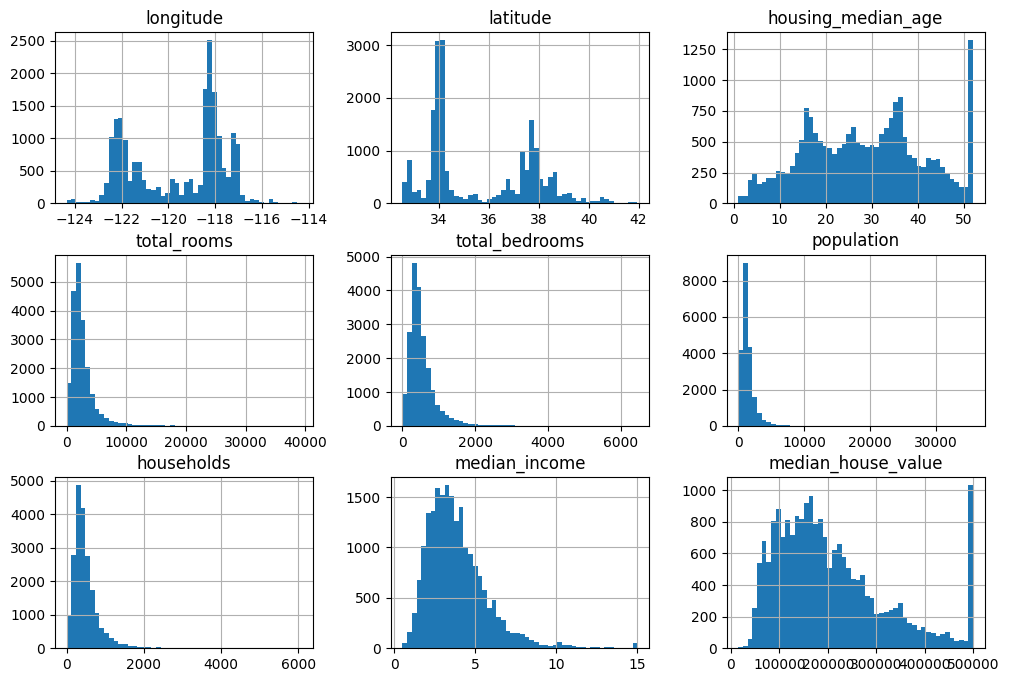

In [33]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12, 8))
plt.show()


In [34]:
#creating test set
from sklearn.model_selection import train_test_split
import numpy as np

# Random Sampling
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Stratified Sampling by median_income
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


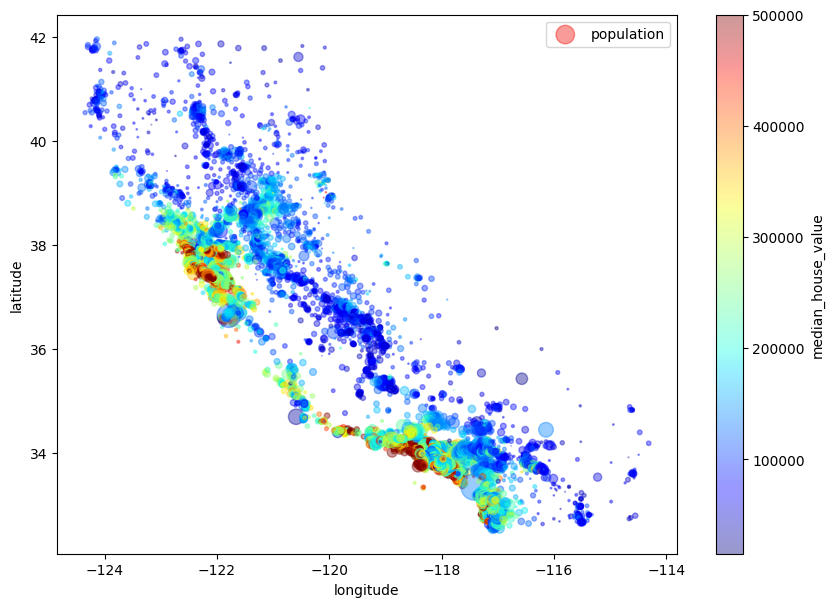

In [36]:
#geographical features visualization
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"),
             colorbar=True, figsize=(10,7))
plt.legend()
plt.show()


In [37]:
#feature corelation with housing prices
corr_matrix = housing.select_dtypes(include=[np.number]).corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))
housing_encoded = pd.get_dummies(housing, drop_first=True)  # Convert categorical to numerical
corr_matrix = housing_encoded.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64
median_house_value            1.000000
median_income                 0.688075
income_cat_5                  0.535253
income_cat_4                  0.206218
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
income_cat_3                 -0.046115
latitude                     -0.144160
income_cat_2                 -0.416886
ocean_proximity_INLAND       -0.484859
Name: median_hous

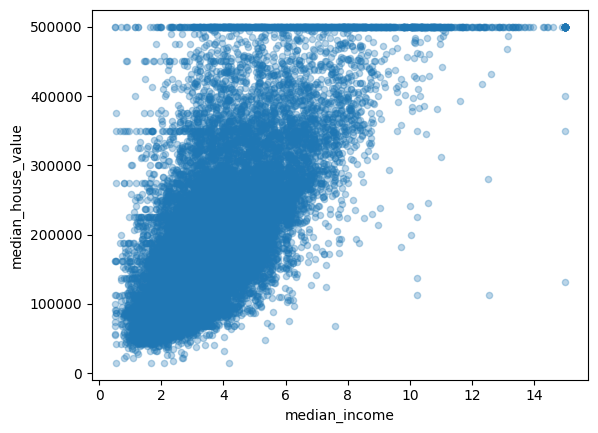

In [38]:
#visualizing median_income vs median_house_value
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.3)
plt.show()


In [39]:
#feature engineering-combining features
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]

corr_matrix = housing.select_dtypes(include=[np.number]).corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))
housing_encoded = pd.get_dummies(housing, drop_first=True)  # Convert categorical to numerical
corr_matrix = housing_encoded.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))


median_house_value     1.000000
median_income          0.688075
rooms_per_household    0.151948
total_rooms            0.134153
housing_median_age     0.105623
households             0.065843
total_bedrooms         0.049686
population            -0.024650
longitude             -0.045967
latitude              -0.144160
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64
median_house_value            1.000000
median_income                 0.688075
income_cat_5                  0.535253
income_cat_4                  0.206218
ocean_proximity_NEAR BAY      0.160284
rooms_per_household           0.151948
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
income_cat_3                 -0.046115
latitude              

In [40]:
#data cleaning
# Handling Missing Values
housing.dropna(subset=["total_bedrooms"], inplace=True)  # Option 1: Remove rows
housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(), inplace=True)  # Option 2: Fill missing values


<ipython-input-40-9c93a146ba9a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(), inplace=True)  # Option 2: Fill missing values


In [29]:
#handling categorical data
housing = pd.get_dummies(housing, columns=["ocean_proximity"], drop_first=True)


In [41]:
#creating machine learning pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Separating numerical and categorical attributes
num_attribs = housing.drop("median_house_value", axis=1).select_dtypes(include=[np.number]).columns
cat_attribs = ["ocean_proximity"]

# Pipeline for numerical attributes
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Full pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs)
])

# Applying the pipeline
housing_prepared = full_pipeline.fit_transform(housing)


In [42]:
#mode selection and training
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(housing_prepared, housing["median_house_value"])

# Predict
predictions = model.predict(housing_prepared)

# Evaluate
mae = mean_absolute_error(housing["median_house_value"], predictions)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 11608.788181862672
